# Random Forest, Penguins
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
penguins = pd.read_csv('penguins.csv')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# !pip install missingno

<AxesSubplot: >

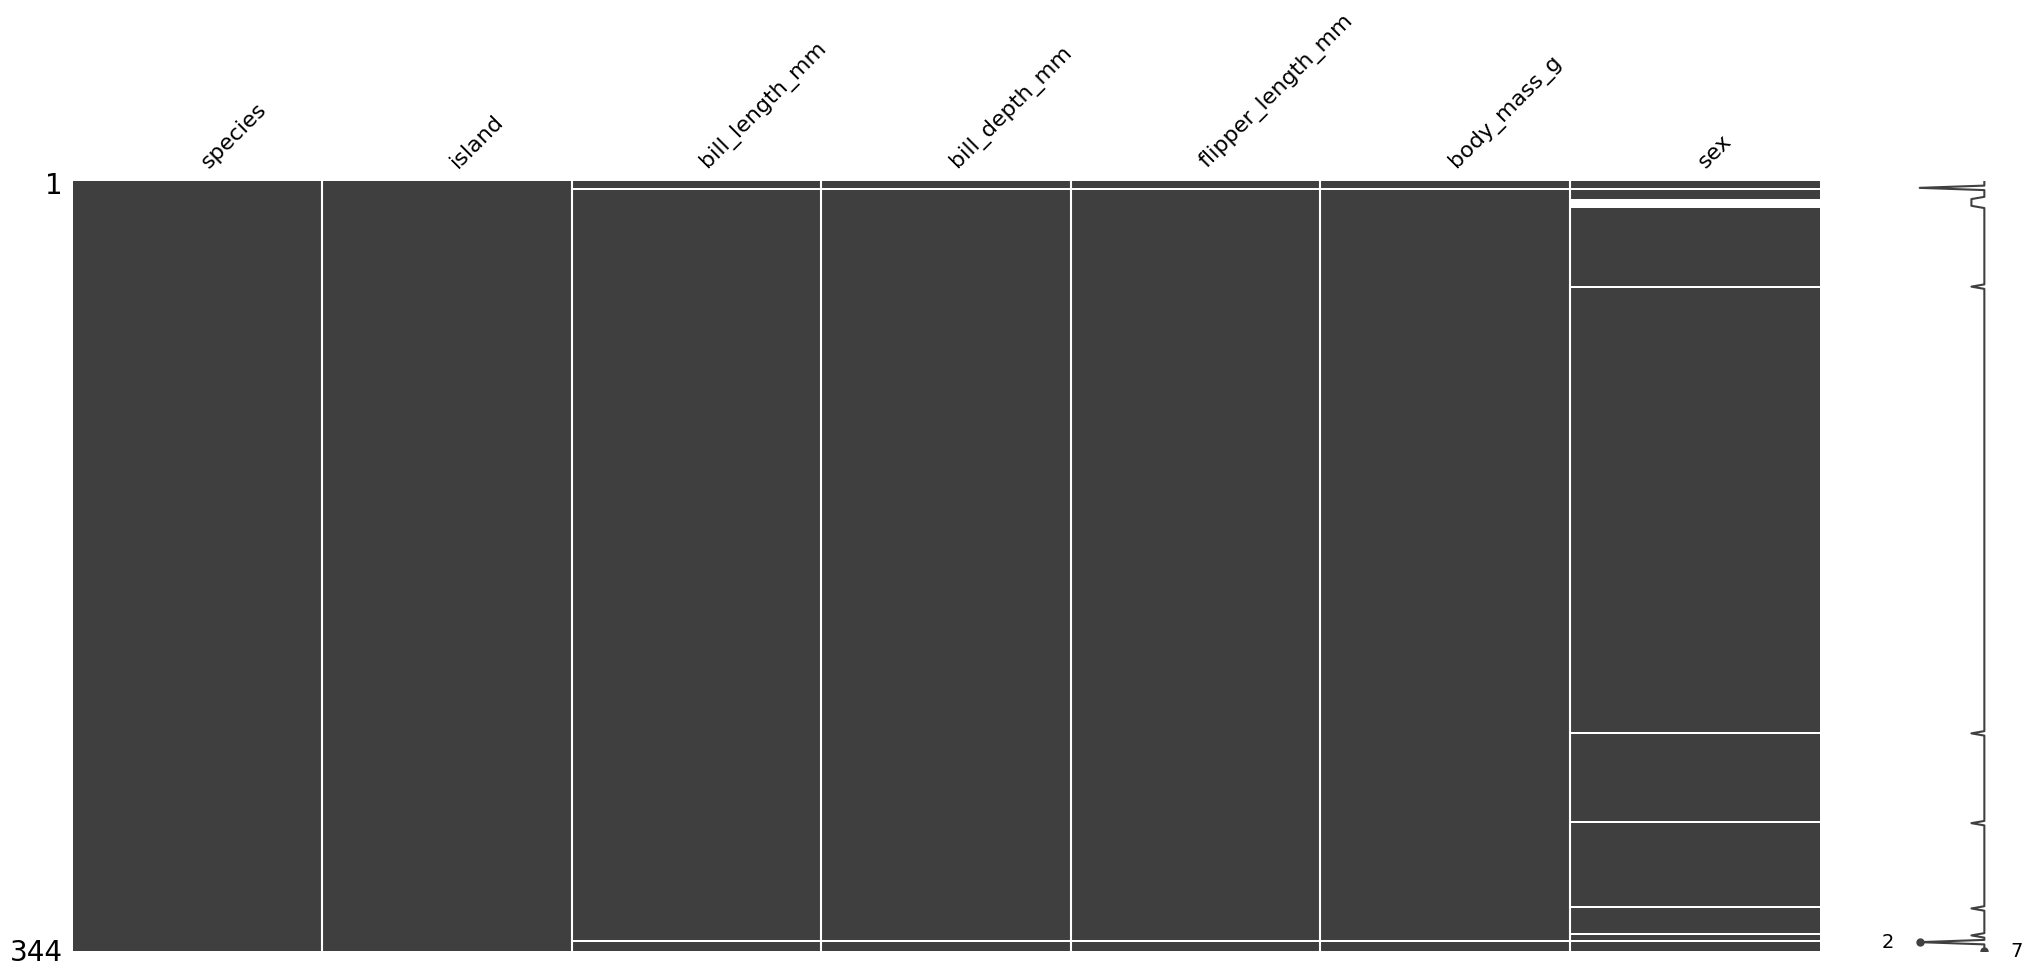

In [6]:
import missingno as msno

msno.matrix(penguins)

In [7]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
penguins.loc[penguins['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
df = penguins.dropna(subset = ['bill_length_mm'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<AxesSubplot: >

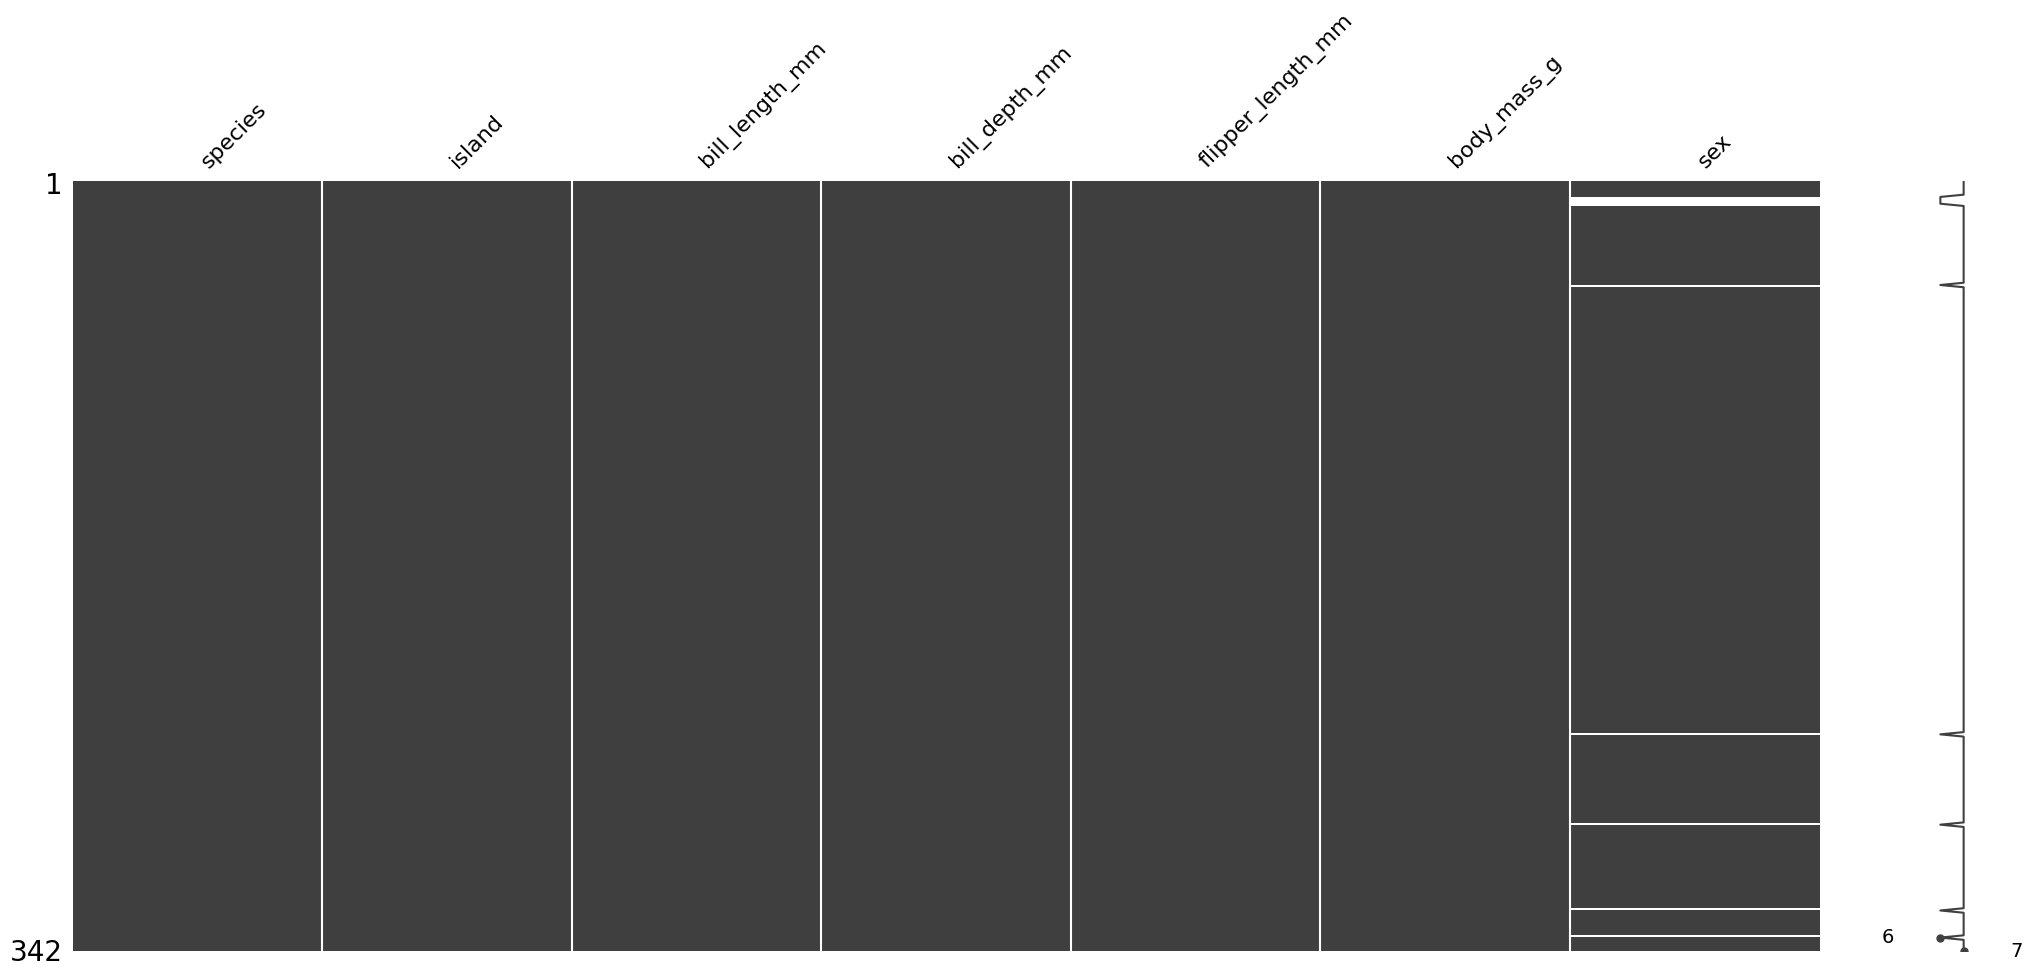

In [10]:
msno.matrix(df)

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [12]:
df['sex'].isna().sum()

9

In [13]:
df['sex'] = df['sex'].fillna('NONE')

C:\Users\최가인\AppData\Local\Temp\ipykernel_13592\2956037306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna('NONE')


In [14]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

<AxesSubplot: >

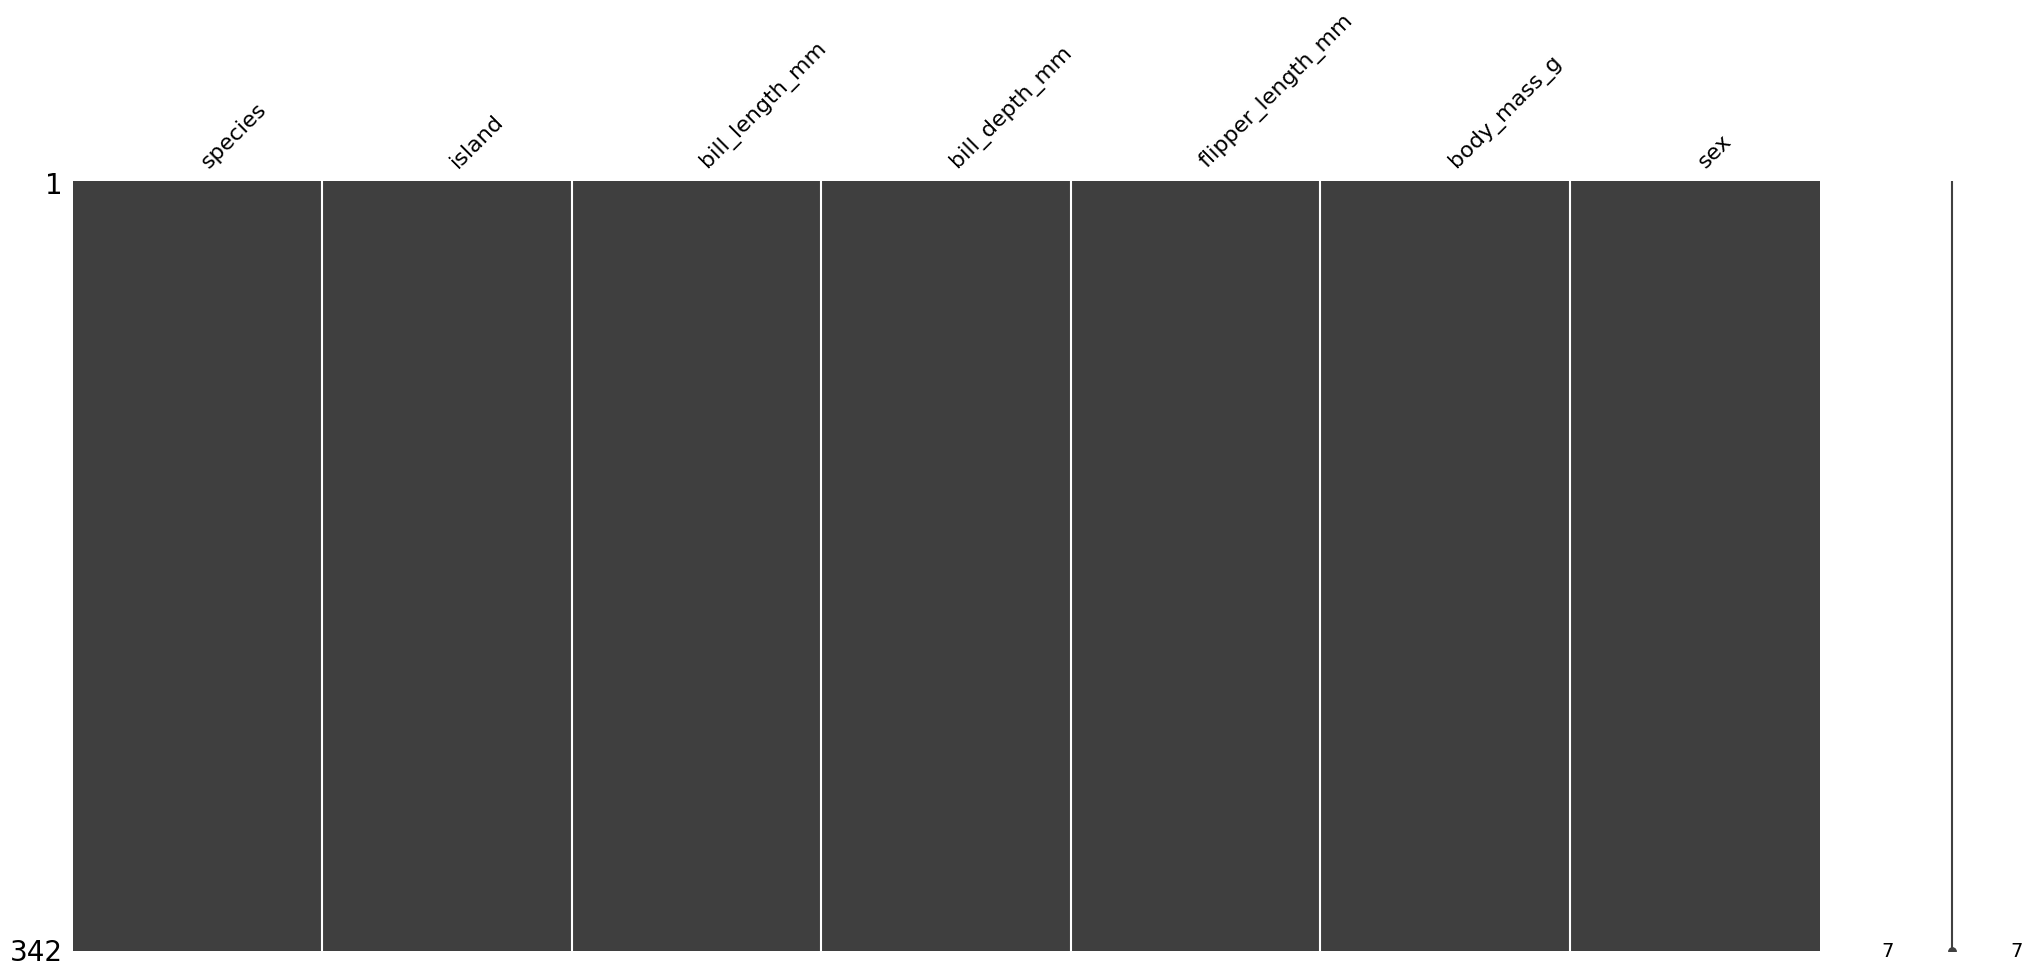

In [15]:
msno.matrix(df)

In [16]:
df['sex'].unique()

array(['MALE', 'FEMALE', 'NONE'], dtype=object)

In [17]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
########## 인코딩
# df['sex'].map()
# df['island'].map({'Biscoe':0, 'Dream':1, 'Torgersen':2})

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['island'] = encoder.fit_transform(df['island'])
df.head()

C:\Users\최가인\AppData\Local\Temp\ipykernel_13592\2748128886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = encoder.fit_transform(df['island'])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,MALE
1,Adelie,2,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,2,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,2,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,2,39.3,20.6,190.0,3650.0,MALE


In [20]:
df['sex'] = encoder.fit_transform(df['sex'])
df.head()

C:\Users\최가인\AppData\Local\Temp\ipykernel_13592\461485397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = encoder.fit_transform(df['sex'])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


In [21]:
### 테스트셋 분리

In [22]:
x = df.drop(['species'], axis = 1)
y = df['species']

x.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify =y, random_state = 2022)

In [24]:
feature_name = x_train.columns

In [25]:
x_train = x_train.values
y_train = y_train.values

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 30, max_depth = 3)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [27]:
clf.score(x_train, y_train)

0.9816849816849816

In [28]:
clf.feature_importances_

array([0.1243923 , 0.3107056 , 0.08576668, 0.39795334, 0.07852573,
       0.00265635])

In [29]:
sr = pd.Series(clf.feature_importances_, index = feature_name)

In [30]:
sr = sr.sort_values(ascending = False)
sr

flipper_length_mm    0.397953
bill_length_mm       0.310706
island               0.124392
bill_depth_mm        0.085767
body_mass_g          0.078526
sex                  0.002656
dtype: float64

<AxesSubplot: >

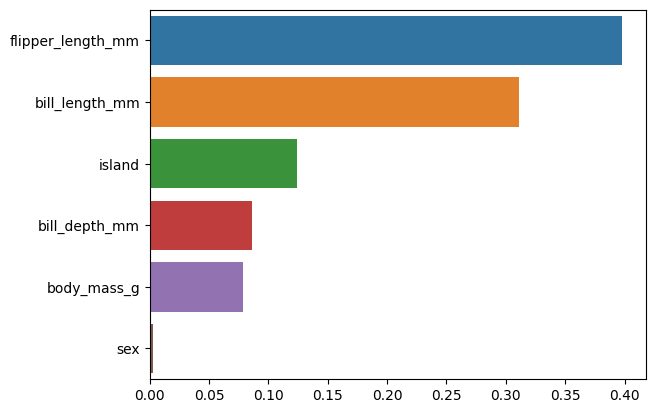

In [31]:
sns.barplot(x = sr, y = sr.index)

In [32]:
### 테스트 데이터